# NGR

Natural Gamma Radiation


In [3]:
# force Jupyter to autoreload modules when they have been edited
# this helps keep the iodp module current as it is actively developed.
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
import os
from importlib import reload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from iodp import ngr, utils



In [289]:
# Ensure we are in the PhysicalProperties root folder
if not os.getcwd().endswith("PhysicalProperties"):
    print("Current working directory:", os.getcwd())
    os.chdir("../")
    
print("New current working directory:", os.getcwd())

New current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\PhysicalProperties


# Reading .SPE File

The NGR uses three different types of .SPE files. The file formats are similar but not identical. The function `ngr.read_ngr_spe()` is meant to be general enough to parse each of these three file types, however, inconsistencies in field names has been a problem over time. The function may require manual tweaking.



In [290]:
file = "./data/input/NGR/395-u1554g-2h-1_sect12466821_20230628123026/395-U1554G-2H-1_0cm_SECT12466821_20230628123026_NaI_8.SPE"

# return the contents of a dataframe
spe = ngr.read_ngr_spe(file,as_dataframe=True)
spe



,FILENAME,DET,TYPE,LABEL_ID_LIST,TEXT_ID_LIST,LENGTH cm,OFFSET cm,TRAY,DETDESC,COMMENTS,...,992,993,994,995,996,997,998,999,1000,1001
0,395-U1554G-2H-1_0cm_SECT12466821_2023062812302...,8,Sample,395-U1554G-2H-1,SECT12466821,151.0,0,titanium,"ASPEC 927, SN 19093002, Version 0927-002, NaI",,...,0,1,0,1,1,0,0,0,0,0


### NGR Measurement Spectra .SPE file

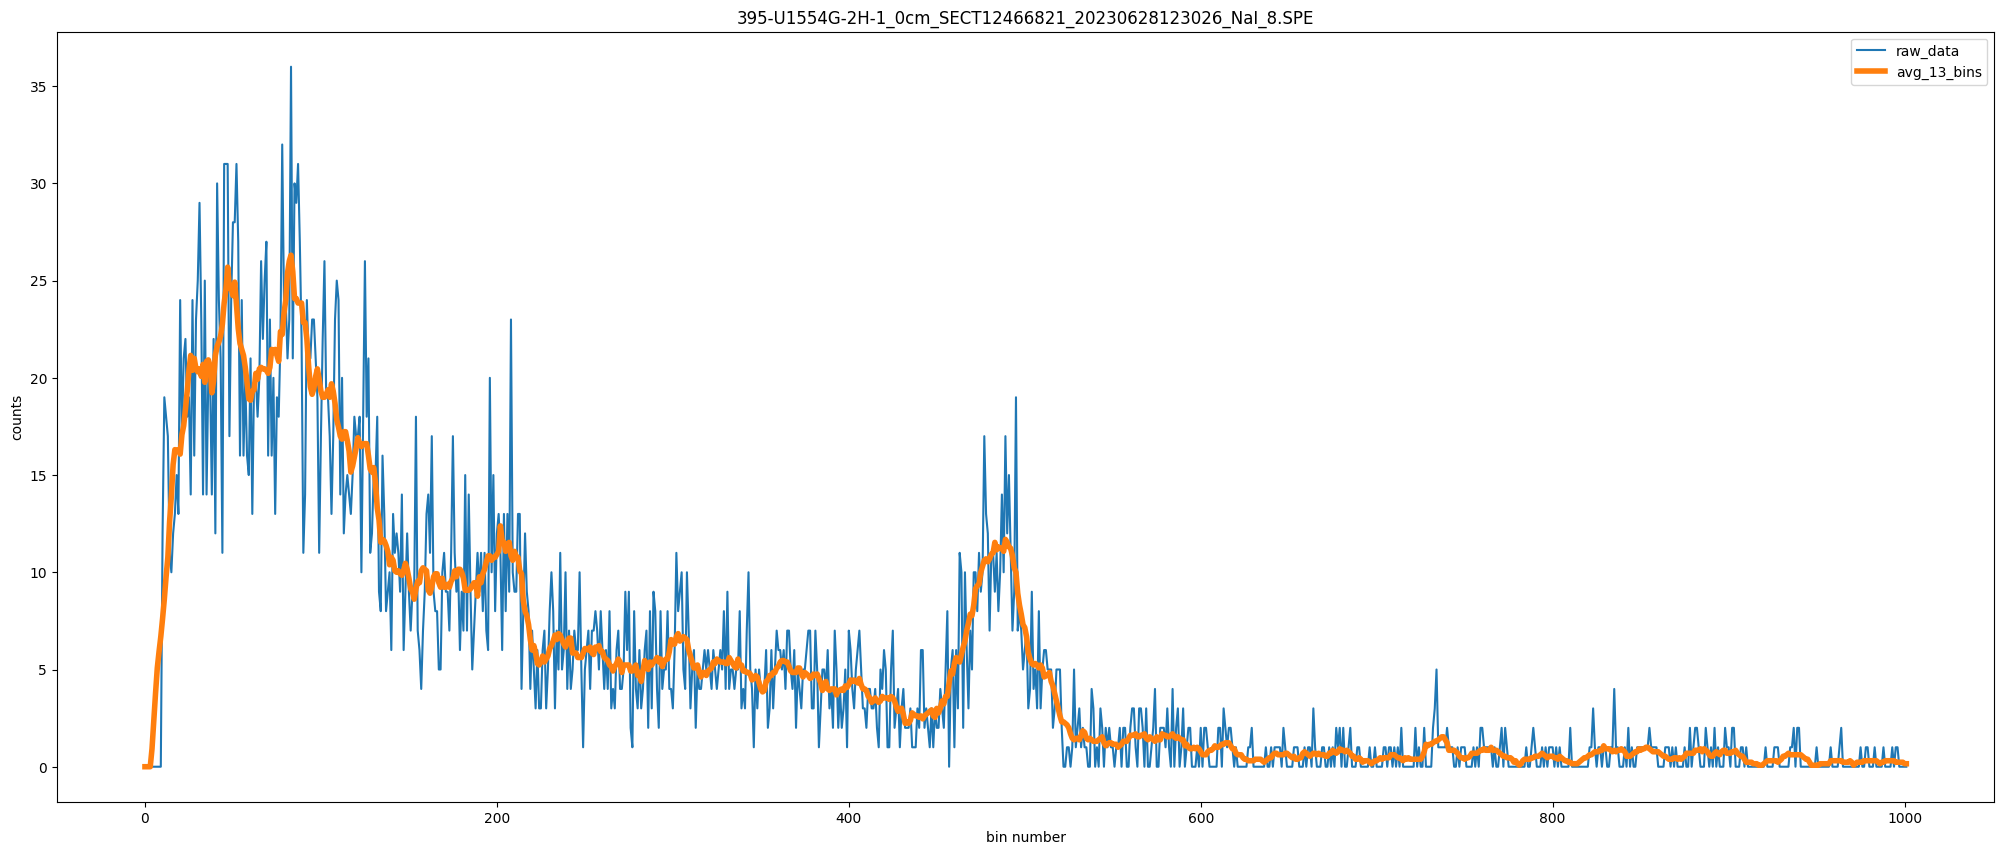

In [291]:
file = "./data/input/NGR/395-u1554g-2h-1_sect12466821_20230628123026/395-U1554G-2H-1_0cm_SECT12466821_20230628123026_NaI_8.SPE"

# return contents as a dictionary, easier to get the spectral counts
spe = ngr.read_ngr_spe(file,as_dataframe=False)


# Plotting a spectrum :
data = np.array(spe['DATA']).astype(int)

# normally bins is 0-1023, so 1024 bins
bins = np.arange(0,len(data))

# performing a 1D convolution to represent a running average of length = window
# "same" retains output array shape, handling boundary effects.
window = 13
avg = np.convolve(data,(1/window)*np.ones(window),"same")

fig, ax = plt.subplots(1,1, figsize=(25,10))
ax.plot(bins, data, label=f"raw_data")
# usec[int(l/2):-int(l/2)] if the convolve method is "full", handles boundary effects.
ax.plot(bins, avg, linewidth=4, label=f"avg_{window}_bins")
ax.set_ylabel('counts')
ax.set_xlabel('bin number')
ax.set_title(spe['FILENAME'])
plt.legend()
plt.show()

### NGR Background Spectra .SPE file

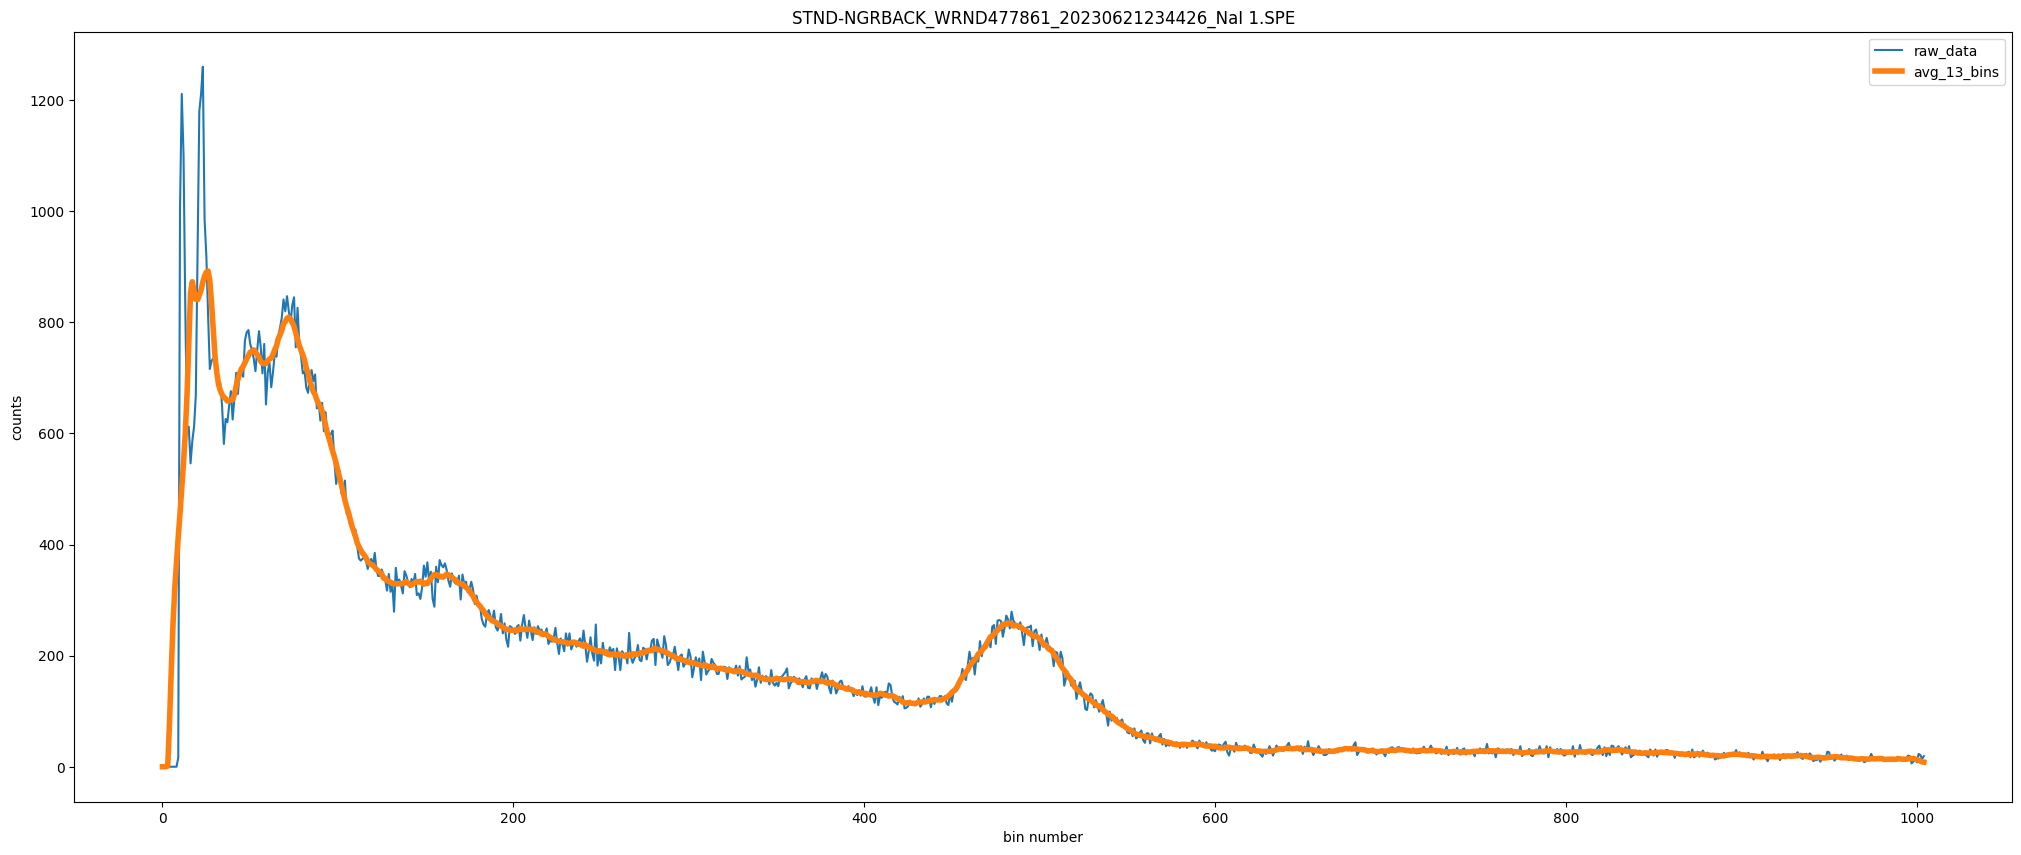

In [292]:
file = './data/input/NGR/395-u1554g-2h-1_sect12466821_20230628123026/STND-NGRBACK_WRND477861_20230621234426_NaI_1.SPE'
# return contents as a dictionary, easier to get the spectral counts

spe = ngr.read_ngr_spe(file,as_dataframe=False)
# Plotting a spectrum :
data = np.array(spe['DATA']).astype(int)

# normally bins is 0-1023, so 1024 bins
bins = np.arange(0,len(data))

# performing a 1D convolution to represent a running average of length = window
# "same" retains output array shape, handling boundary effects.
window = 13
avg = np.convolve(data,(1/window)*np.ones(window),"same")

fig, ax = plt.subplots(1,1, figsize=(25,10))
ax.plot(bins, data, label=f"raw_data")
# usec[int(l/2):-int(l/2)] if the convolve method is "full", handles boundary effects.
ax.plot(bins, avg, linewidth=4, label=f"avg_{window}_bins")
ax.set_ylabel('counts')
ax.set_xlabel('bin number')
ax.set_title(spe['FILENAME'])
plt.legend()
plt.show()


### NGR Calibration Spectra .SPE file

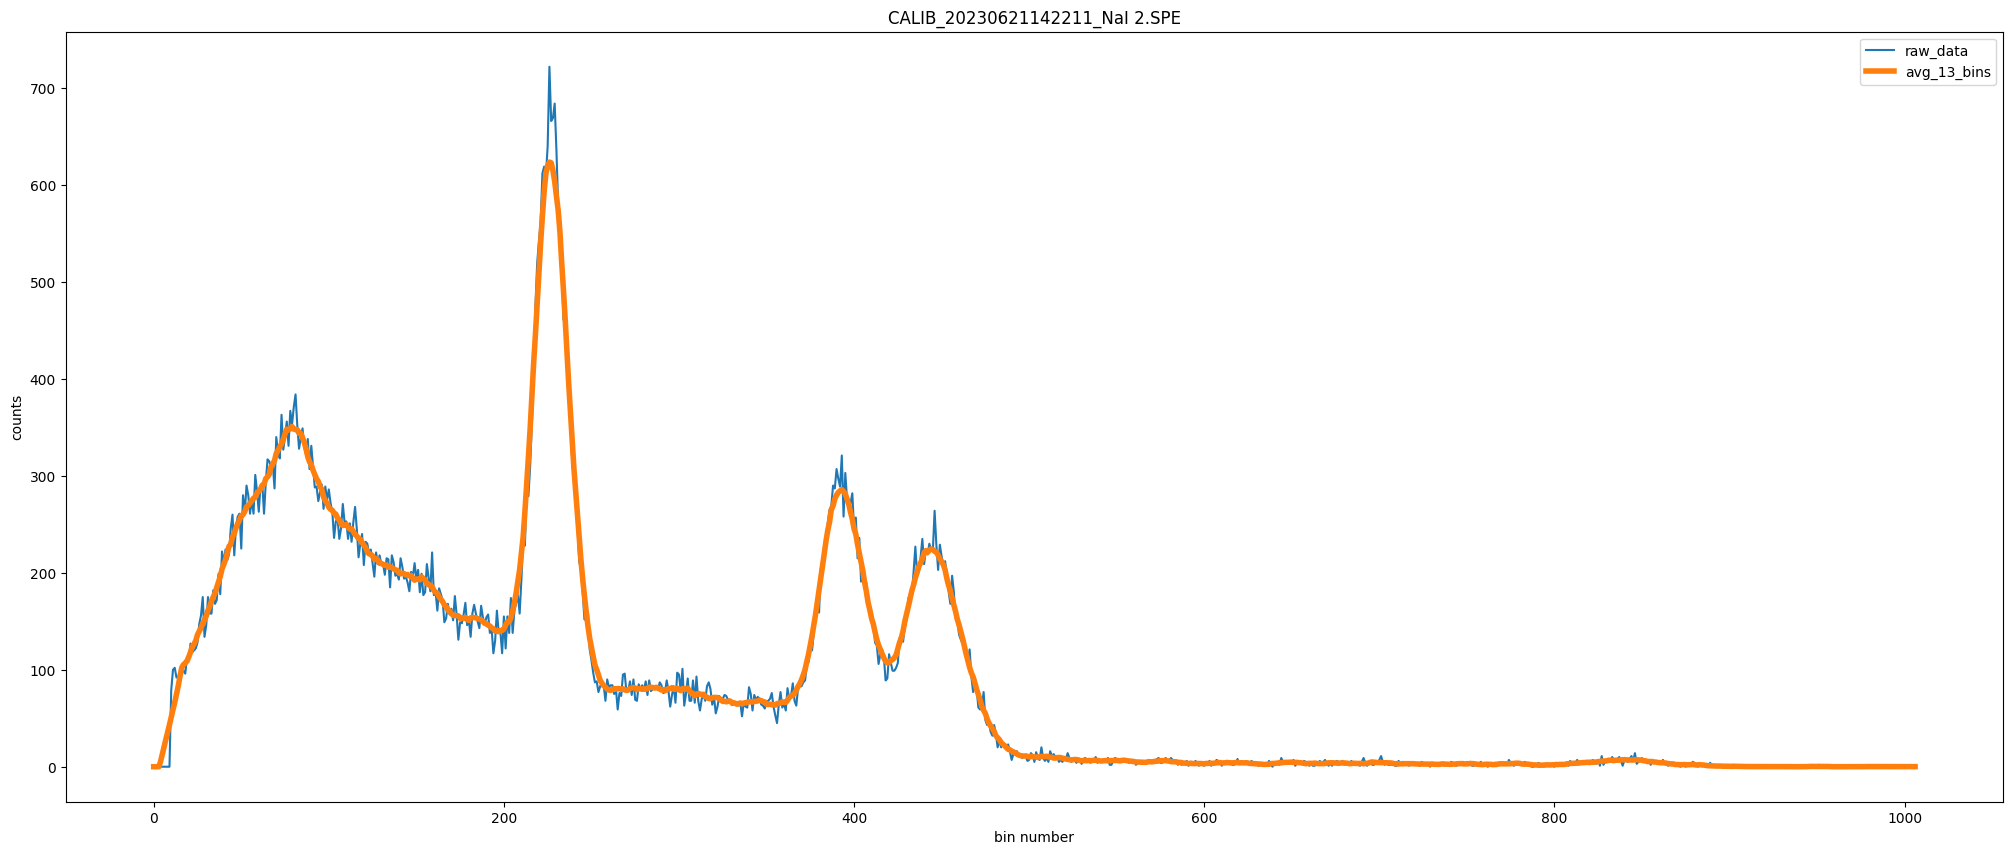

In [293]:
file = "./data/input/NGR/395-u1554g-2h-1_sect12466821_20230628123026/CALIB_20230621142211_NaI_2.SPE"

spe = ngr.read_ngr_spe(file,as_dataframe=False)
# Plotting a spectrum :
data = np.array(spe['DATA']).astype(int)

# normally bins is 0-1023, so 1024 bins
bins = np.arange(0,len(data))

# performing a 1D convolution to represent a running average of length = window
# "same" retains output array shape, handling boundary effects.
window = 13
avg = np.convolve(data,(1/window)*np.ones(window),"same")

fig, ax = plt.subplots(1,1, figsize=(25,10))
ax.plot(bins, data, label=f"raw_data")
# usec[int(l/2):-int(l/2)] if the convolve method is "full", handles boundary effects.
ax.plot(bins, avg, linewidth=4, label=f"avg_{window}_bins")
ax.set_ylabel('counts')
ax.set_xlabel('bin number')
ax.set_title(spe['FILENAME'])
plt.legend()
plt.show()


# Read NGR .csv files

In [294]:
file = './data/input/NGR/395-u1554g-2h-1_sect12466821_20230628123026.csv'
df = pd.read_csv(file)
df

,Label ID,Text_ID,Offset,Distance From Edge,Edge Correction Factor,Edge Relative Error,Detector #,Sample Measuring Time,Total Sample Counts,Total Sample Counts < 100KeV,...,Relative Background Error,Relative Background Percent Error,Total Corrected Counts/Sec > 100KeV,Absolute Total Error,Relative Total Error,Relative Percent Error,Threshold (KeV),Sample Threshold Channel,Background Threshold Channel,Unnamed: 30
0,395-U1554G-2H-1,SECT12466821,0,0.0,2.18,0.057182,8,300.0,5258,631,...,0.002690,0.268951,19.670261,1.229170,0.062489,6.248877,100,44,44,NaN
1,395-U1554G-2H-1,SECT12466821,10,10.0,1.14,0.017216,8,300.0,7441,839,...,0.002690,0.268951,17.791283,0.435352,0.024470,2.446998,100,44,44,NaN
2,395-U1554G-2H-1,SECT12466821,20,20.0,1.00,0.000000,7,300.0,8404,1088,...,0.002665,0.266522,17.869167,0.285641,0.015985,1.598512,100,43,43,NaN
3,395-U1554G-2H-1,SECT12466821,30,30.0,1.00,0.000000,7,300.0,8323,1048,...,0.002665,0.266522,17.732500,0.284842,0.016063,1.606328,100,43,43,NaN
4,395-U1554G-2H-1,SECT12466821,40,40.0,1.00,0.000000,6,300.0,8781,1272,...,0.002689,0.268893,18.626944,0.289361,0.015535,1.553454,100,47,47,NaN
5,395-U1554G-2H-1,SECT12466821,50,50.0,1.00,0.000000,6,300.0,8843,1208,...,0.002689,0.268893,19.046944,0.291770,0.015318,1.531847,100,47,47,NaN
6,395-U1554G-2H-1,SECT12466821,60,60.0,1.00,0.000000,5,300.0,8733,1124,...,0.002721,0.272085,19.109630,0.291263,0.015242,1.524167,100,43,43,NaN
7,395-U1554G-2H-1,SECT12466821,70,70.0,1.00,0.000000,5,300.0,8334,1095,...,0.002721,0.272085,17.876296,0.284118,0.015894,1.589354,100,43,43,NaN
8,395-U1554G-2H-1,SECT12466821,80,71.0,1.00,0.000000,4,300.0,8892,1208,...,0.002688,0.268774,19.204583,0.292702,0.015241,1.524126,100,45,45,NaN
9,395-U1554G-2H-1,SECT12466821,90,61.0,1.00,0.000000,4,300.0,8706,1119,...,0.002688,0.268774,18.881250,0.290855,0.015404,1.540444,100,45,45,NaN


# Read NGR .NGR files


In [296]:
content = []
file = './data/input/NGR/395-U1554G-2H-1_20230628123027.NGR'

df = utils.read_instrument_file(file, as_dataframe=True)
df.head()

,datetime,labelid,user,text_id,instrument,instrument_group,observed_length,comment,period,archive,configuration,summary,positions_excluded,offset,detector,total_counts_per_sec,relative_error,absolute_error
0,2023-06-28 12:30:27 UTC,395-U1554G-2H-1,JR_MARONE,SECT12466821,"0) ORTEC MODEL: ASPEC927 S/N: 7022362, 1) ORTE...",NGR SYSTEM,1.51,,300.000,c:\aux_data\zip\u1554g\395-u1554g-2h-1_sect124...,c:\ims\config_ngr\i_pi_ngr927.ini,c:\aux_data\reduction\u1554g\395-u1554g-2h-1_s...,FALSE,0,8,19.67026111,0.06248876957,1.229170414
1,2023-06-28 12:30:27 UTC,395-U1554G-2H-1,JR_MARONE,SECT12466821,"0) ORTEC MODEL: ASPEC927 S/N: 7022362, 1) ORTE...",NGR SYSTEM,1.51,,300.000,c:\aux_data\zip\u1554g\395-u1554g-2h-1_sect124...,c:\ims\config_ngr\i_pi_ngr927.ini,c:\aux_data\reduction\u1554g\395-u1554g-2h-1_s...,FALSE,10,8,17.79128333,0.02446997953,0.4353523390
2,2023-06-28 12:30:27 UTC,395-U1554G-2H-1,JR_MARONE,SECT12466821,"0) ORTEC MODEL: ASPEC927 S/N: 7022362, 1) ORTE...",NGR SYSTEM,1.51,,300.000,c:\aux_data\zip\u1554g\395-u1554g-2h-1_sect124...,c:\ims\config_ngr\i_pi_ngr927.ini,c:\aux_data\reduction\u1554g\395-u1554g-2h-1_s...,FALSE,20,7,17.86916667,0.01598511741,0.2856407271
3,2023-06-28 12:30:27 UTC,395-U1554G-2H-1,JR_MARONE,SECT12466821,"0) ORTEC MODEL: ASPEC927 S/N: 7022362, 1) ORTE...",NGR SYSTEM,1.51,,300.000,c:\aux_data\zip\u1554g\395-u1554g-2h-1_sect124...,c:\ims\config_ngr\i_pi_ngr927.ini,c:\aux_data\reduction\u1554g\395-u1554g-2h-1_s...,FALSE,30,7,17.73250000,0.01606328399,0.2848421834
4,2023-06-28 12:30:27 UTC,395-U1554G-2H-1,JR_MARONE,SECT12466821,"0) ORTEC MODEL: ASPEC927 S/N: 7022362, 1) ORTE...",NGR SYSTEM,1.51,,300.000,c:\aux_data\zip\u1554g\395-u1554g-2h-1_sect124...,c:\ims\config_ngr\i_pi_ngr927.ini,c:\aux_data\reduction\u1554g\395-u1554g-2h-1_s...,FALSE,40,6,18.62694444,0.01553453767,0.2893609702


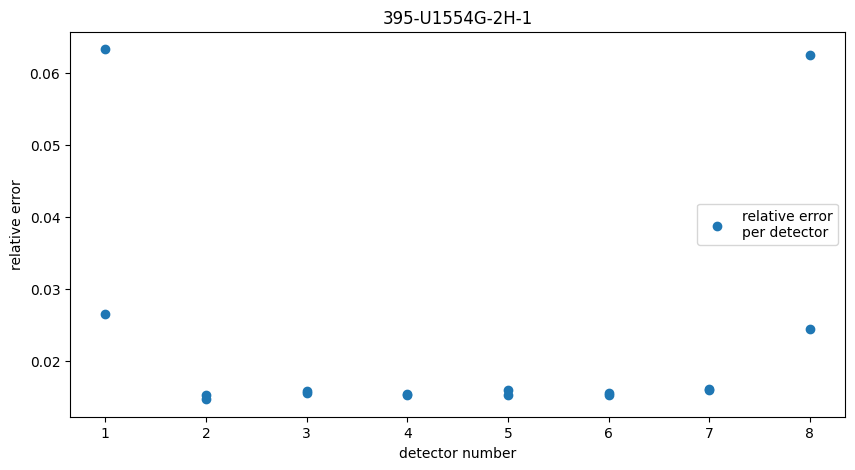

In [306]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.scatter(
    df['detector'].astype(int),
    df['relative_error'].astype(float),
    label='relative error\nper detector'
        )
ax.set_xlabel('detector number')
ax.set_ylabel('relative error')
ax.set_title(f"{df['labelid'].iloc[0]}")
plt.legend()
plt.show()

# Read NGR .ini file

In [336]:
file = './data/input/NGR/395-u1554g-2h-1_sect12466821_20230628123026/I_PI_NGR927.INI'
df = utils.read_instrument_ini(file, as_dataframe=True)
df

,value
key,
mgi rwa section options,2.0.1 %04Y%02m%02d %02H%02M%S%25u*~|.%d*~|....
ims framework-major,14
ims framework-minor,0
plugin-major,0
plugin-minor,0
...,...
value 7.ngr927.edge.correction table.btm,"<21 5>20,1,0,0,0.94,19,1.01,0.01,0.009604334,0..."
value 7.ngr927.edge.profile.offset,"<1971>-6,-5.9,-5.8,-5.7,-5.6,-5.5,-5.4,-5.3,-5..."
value 7.ngr927.edge.profile.profile,"<1971>446,462,460,447,427,438,453,477,446,451,..."


# Read NGR Edge Correction .txt

The edge correction text file contains info for how corrections have been applied to the outermost NGR detectors.

Column descriptions are at the base of the file.

```
Edge corrections for NGR estimated on 2009-03-02 UTC
This is a tab delimited text file
Column 1: Distance from the detector's response center to the edge of the section in centimeters (cm)
Column 2: Correction coefficient
Column 3: Weighting factor
Column 4: Relative error
Column 5: Percent Relative error (%)
```

In [341]:
file = "./data/input/NGR/395-u1554g-2h-1_sect12466821_20230628123026/NGR_EDGE_CORRECTION_20090302.txt"

df = ngr.read_ngr_edge_correction_txt(file)
df.head()

,Distance_to_edge_cm,Correction_Coefficent,Absolute_Error,Relative_Error,%_Relative_Error
0,20.0,1.00,0.00,0.000000,0.94%
1,19.0,1.01,0.01,0.009604,0.91%
2,18.0,1.01,0.01,0.009013,0.96%
3,17.0,1.02,0.01,0.009076,0.90%
4,16.0,1.02,0.01,0.010143,0.91%


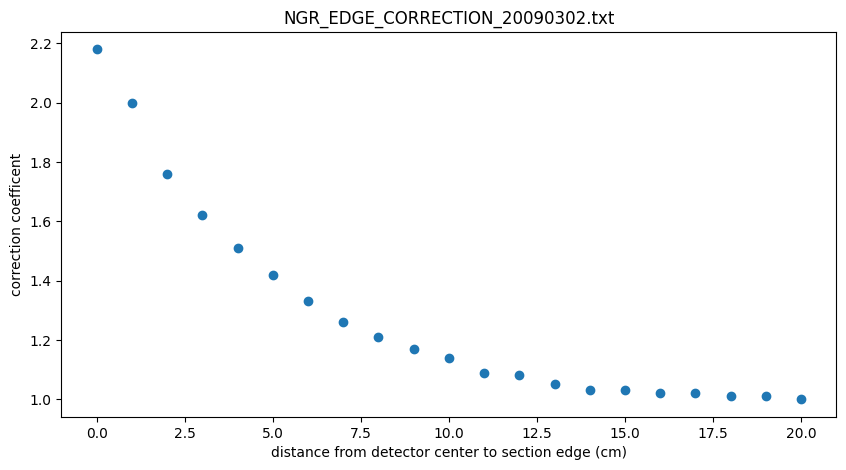

In [342]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(
    x=df['Distance_to_edge_cm'],
    y=df['Correction_Coefficent'],
    label='correction coefficient')

ax.set_xlabel("distance from detector center to section edge (cm)")
ax.set_ylabel("correction coefficent")
ax.set_title(f"{os.path.split(file)[-1]}")
plt.show()

# Exploring the NGR Calibration

An NGR calibration is performed periodically. The calibration files are stored for all subsequent measurements the measurement .zip file.


data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\CALIB_20230621142211_NaI_1.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\CALIB_20230621142211_NaI_2.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\CALIB_20230621142211_NaI_3.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\CALIB_20230621142211_NaI_4.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\CALIB_20230621142211_NaI_5.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\CALIB_20230621142211_NaI_6.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\CALIB_20230621142211_NaI_7.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\CALIB_20230621142211_NaI_8.SPE


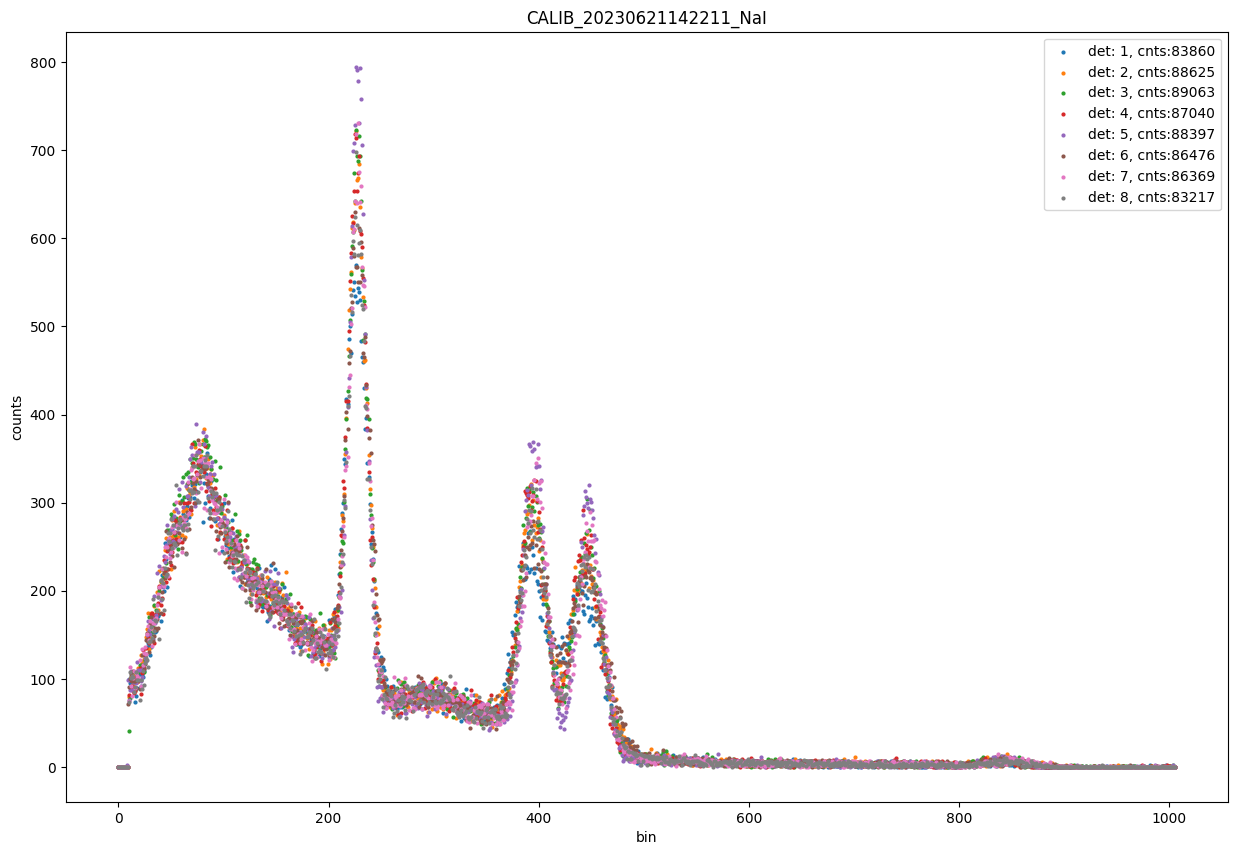

In [371]:
# the zip has already been extracted
# here we are accessing its files
import re

pat = r"^CALIB_\d+_NaI_\d.SPE$"
folder = "./data/input/NGR/395-u1554g-2h-1_sect12466821_20230628123026"
calibs = []
for f in os.listdir(folder):
    if re.match(pat, f):
        calibs.append(os.path.normpath(os.path.join(folder,f)))

for c in calibs:
    print(c)    
    
fig, ax = plt.subplots(1,1,figsize=(15,10))
for f in calibs:
    d = ngr.read_ngr_spe(f)
    x = np.arange(0, len(d['DATA']))
    y = np.array(d['DATA']).astype(int)
    ax.scatter(
        x=x,
        y=y,
        label = f'det: {d["DET"]}, cnts:{y.sum()}',
        s=4
        #linestyle='--'
    )

ax.set_xlabel("bin")
ax.set_ylabel("counts")
ax.set_title(f"{d["FILENAME"].split(" ")[0]}")

ax.legend()

# Exploring Background Corrections

data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\STND-NGRBACK_WRND477861_20230621234426_NaI_1.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\STND-NGRBACK_WRND477861_20230621234426_NaI_2.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\STND-NGRBACK_WRND477861_20230621234426_NaI_3.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\STND-NGRBACK_WRND477861_20230621234426_NaI_4.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\STND-NGRBACK_WRND477861_20230621234426_NaI_5.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\STND-NGRBACK_WRND477861_20230621234426_NaI_6.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\STND-NGRBACK_WRND477861_20230621234426_NaI_7.SPE
data\input\NGR\395-u1554g-2h-1_sect12466821_20230628123026\STND-NGRBACK_WRND477861_20230621234426_NaI_8.SPE


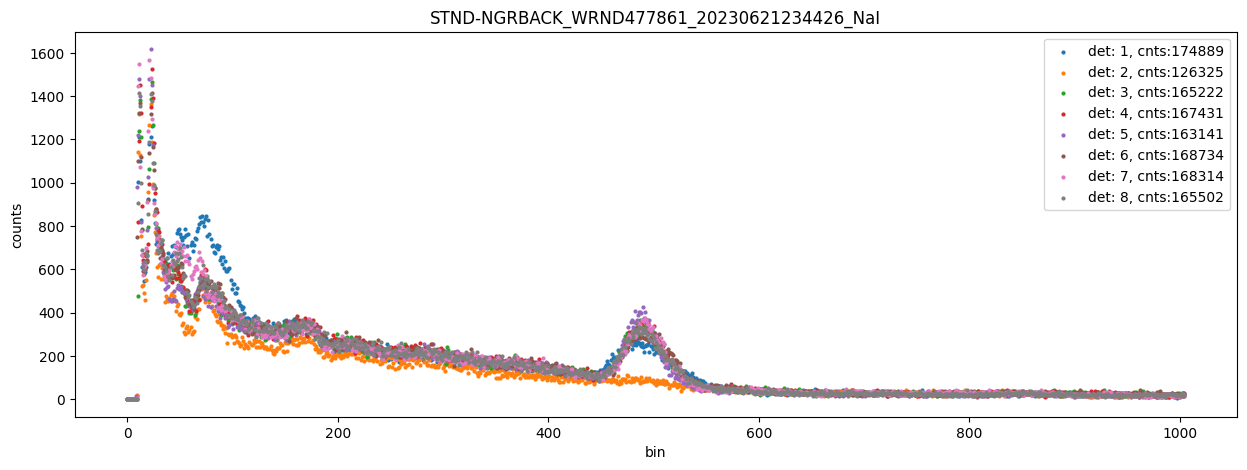

In [378]:
# the zip has already been extracted
# here we are accessing its files
import re

pat = r"^STND-NGRBACK_.+_\d+_NaI_\d.SPE$"
folder = "./data/input/NGR/395-u1554g-2h-1_sect12466821_20230628123026"
calibs = []
for f in os.listdir(folder):
    if re.match(pat, f):
        calibs.append(os.path.normpath(os.path.join(folder,f)))

for c in calibs:
    print(c)    
    
fig, ax = plt.subplots(1,1,figsize=(15,5))
for f in calibs:
    
    d = ngr.read_ngr_spe(f)
    # if d['DET'] != "3":
    #     continue
    
    x = np.arange(0, len(d['DATA']))
    y = np.array(d['DATA']).astype(int)
    ax.scatter(
        x=x,
        y=y,
        label = f'det: {d["DET"]}, cnts:{y.sum()}',
        s=4
        #linestyle='--'
    )

ax.set_xlabel("bin")
ax.set_ylabel("counts")
ax.set_title(f"{d["FILENAME"].split(" ")[0]}")

ax.legend()